In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
img = cv2.imread("images/lenna.png", 0)

In [6]:
# create sobel-x
# Parameters -> image, ddepth, dx, dy, 
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = 3)

# create sobel-y
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = 3)

In [8]:
sobelx.shape

(512, 512)

In [10]:
sobely

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [-12.,  -4.,   9., ...,  18.,  34.,  44.],
       [  0.,   5.,  12., ...,  11.,  22.,  28.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [11]:
combined_sobel = cv2.add(sobelx, sobely)

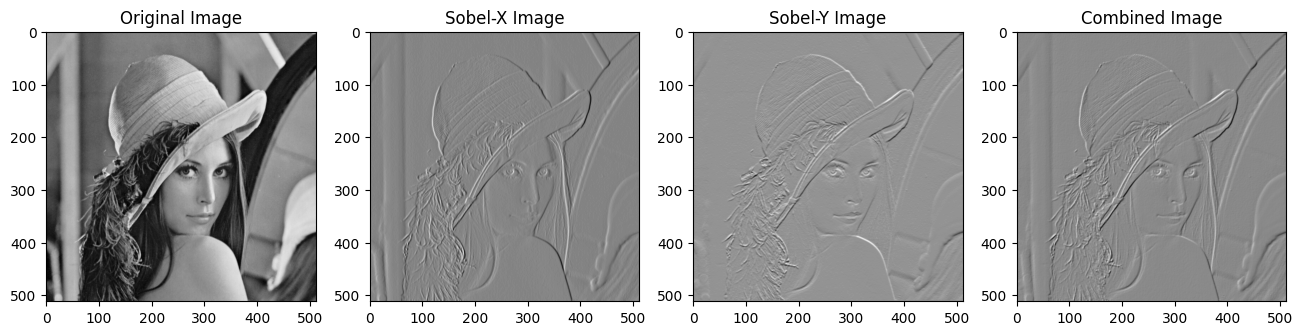

In [14]:
plt.figure(figsize=(16,9))
plt.subplot(141);  plt.title("Original Image"); plt.imshow(img, cmap = 'gray')
plt.subplot(142);  plt.title("Sobel-X Image"); plt.imshow(sobelx, cmap = 'gray')
plt.subplot(143);  plt.title("Sobel-Y Image"); plt.imshow(sobely, cmap = 'gray')
plt.subplot(144);  plt.title("Combined Image"); plt.imshow(combined_sobel, cmap = 'gray')

In [18]:
cv2.imshow("Final Image", combined_sobel)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
combined_sobel.min(), combined_sobel.max()

(-894.0, 772.0)

##### Scharr Edge Detection

In [22]:
scharrx = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(img, cv2.CV_64F, 0, 1)

In [23]:
combined_scharr = cv2.add(scharrx, scharry)

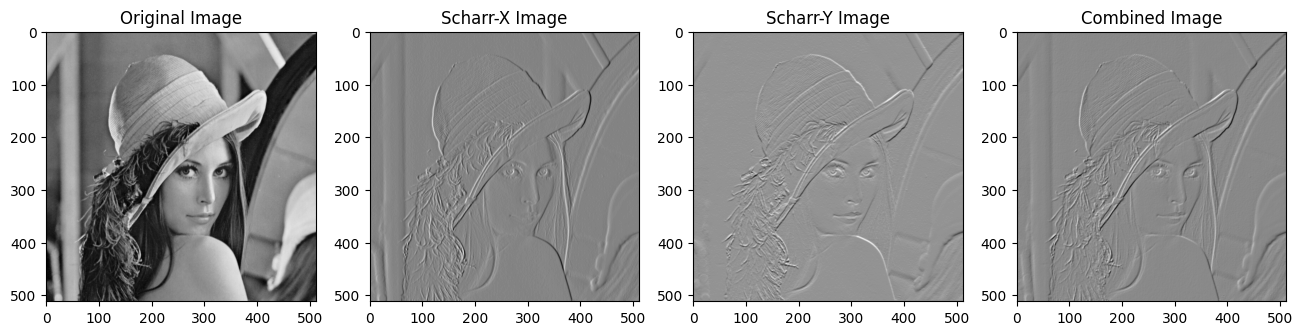

In [25]:
plt.figure(figsize=(16,9))
plt.subplot(141);  plt.title("Original Image"); plt.imshow(img, cmap = 'gray')
plt.subplot(142);  plt.title("Scharr-X Image"); plt.imshow(scharrx, cmap = 'gray')
plt.subplot(143);  plt.title("Scharr-Y Image"); plt.imshow(scharry, cmap = 'gray')
plt.subplot(144);  plt.title("Combined Image"); plt.imshow(combined_scharr, cmap = 'gray')

In [26]:
cv2.imshow("Final Image", combined_scharr)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Canny Edge Detection

In [29]:
# Apply gaussian blur
blurred = cv2.GaussianBlur(img, (5, 5), 0)

In [33]:
# Apply the blurred image to canny edge detection
edges = cv2.Canny(blurred, 50, 150)

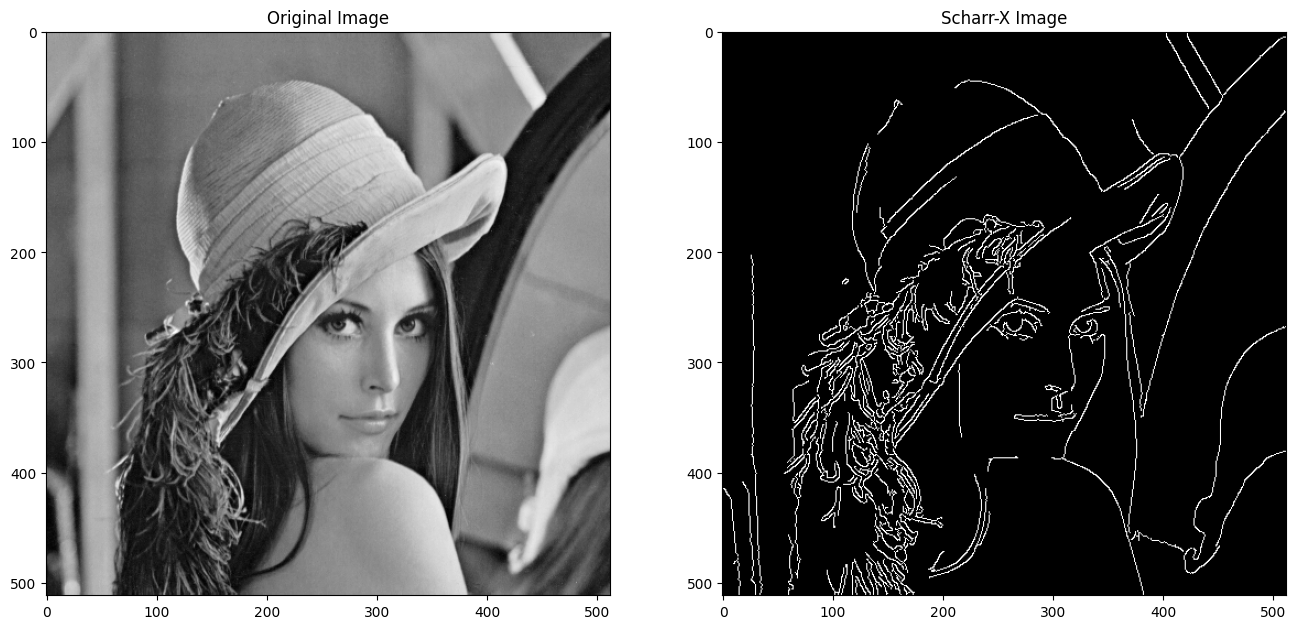

In [34]:
plt.figure(figsize=(16,9))
plt.subplot(121);  plt.title("Original Image"); plt.imshow(img, cmap = 'gray')
plt.subplot(122);  plt.title("Scharr-X Image"); plt.imshow(edges, cmap = 'gray')

In [35]:
input2 = cv2.imread("images/input2.png")

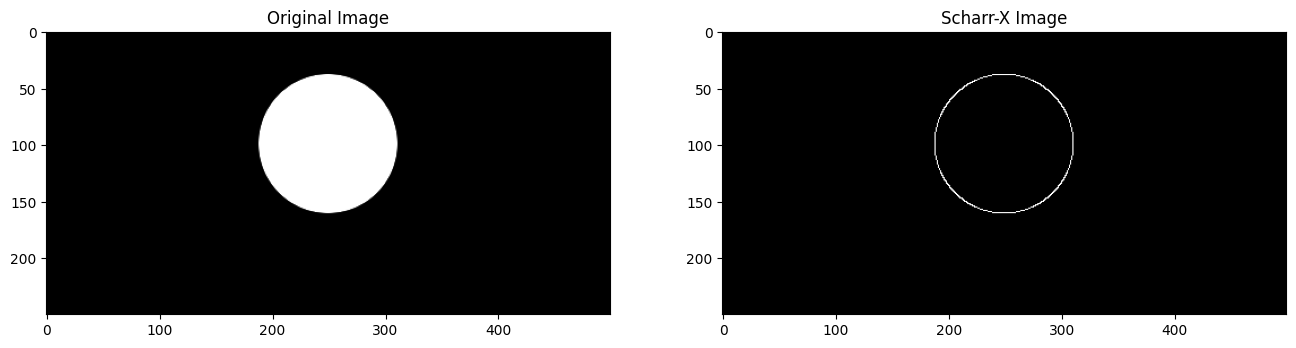

In [36]:
blurred = cv2.GaussianBlur(input2, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)

plt.figure(figsize=(16,9))
plt.subplot(121);  plt.title("Original Image"); plt.imshow(input2, cmap = 'gray')
plt.subplot(122);  plt.title("Scharr-X Image"); plt.imshow(edges, cmap = 'gray')

##### Contours Detection

In [39]:
img_sun = cv2.imread("images/sun.png", 0)

In [40]:
ret, thresh = cv2.threshold(img_sun, 100, 255, cv2.THRESH_OTSU)

In [41]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,
                                      cv2.CHAIN_APPROX_SIMPLE)

In [45]:
len(contours)

446

In [46]:
cv2.drawContours(img_sun, contours, -1, (0,255,0), 2)

array([[  0,   0,   0, ...,  88,  87,  86],
       [  0,   0,   0, ...,  87,  86,  85],
       [102, 102, 102, ...,  86,  85,  85],
       ...,
       [ 11,  10,  10, ...,  29,  25,  17],
       [  9,  10,   6, ...,  30,  21,  19],
       [ 10,   9,   4, ...,  23,  18,  18]], dtype=uint8)

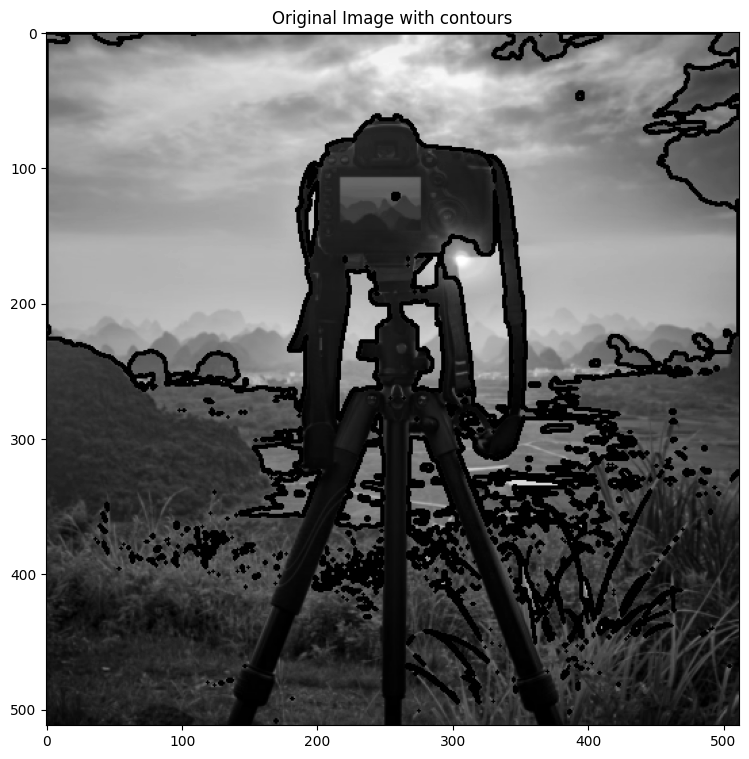

In [51]:
plt.figure(figsize=(16,9))
plt.title("Original Image with contours"); plt.imshow(img_sun, cmap = 'gray')